# Getting Started

This tutorial will help you install the ESGF End-user API and demonstrate some of the capabilites using ESGF's WPS server on [aims2](https://aims2.llnl.gov).

## Step 1

Install miniconda for your OS.

* Miniconda for [MacOS](https://conda.io/docs/user-guide/install/macos.html) follow those instructions.

* Miniconda for [Linux](https://conda.io/docs/user-guide/install/linux.html) follow those instructions.

## Step 2

Install the required packages from conda.

```bash
conda install -c conda-forge -c cdat esgf-compute-api
```

## Step 3

Next you'll want to create an account on [aims2](https://aims2.llnl.gov/) and retrieve an API key, giving you access
to LLNL's ESGF Compute Node. Follow the instructions on the landing page.

## Step 4

Now we'll run through some basics of using the ESGF Compute End-user API.

## Setup your connection the compute server

Replace the `host`, `api_key`, `verify` to appropiate values.

In [ ]:
import os
import cwt

wps_url = os.environ.get('WPS_URL', 'https://aims2.llnl.gov/wps')
verify = bool(os.environ.get('WPS_VERIFY', False))
compute_token = os.environ.get('WPS_TOKEN', '<token>')

client = cwt.WPSClient(wps_url, compute_token=compute_token, verify=verify)
client

## List the available processes
This will print out a list of the available processes.

In [11]:
for p in client.processes():
    print(p.identifier)

CDAT.metrics
CDAT.workflow
CDAT.abs
CDAT.add
CDAT.aggregate
CDAT.divide
CDAT.exp
CDAT.filter_map
CDAT.log
CDAT.max
CDAT.mean
CDAT.min
CDAT.multiply
CDAT.power
CDAT.subset
CDAT.subtract
CDAT.sum
CDAT.merge
CDAT.where
CDAT.groupby_bins
CDAT.count
CDAT.squeeze
CDAT.std
CDAT.var
CDAT.sqrt


## Search for a specific process

This will find all processes matching the [regular expression](https://docs.python.org/2/library/re.html).

In [12]:
for p in client.processes('.*\\.subset'):
    print(p.identifier)

CDAT.subset


## Choose a process to execute
Let's choose which process we'll be executing.

In [13]:
proc = client.CDAT.subset()
proc

Process(name=e33fcd19-9813-4fc6-bb22-45bc1f6b3c56, identifier=CDAT.subset, inputs=[], parameters={}, domain=None, title=CDAT.subset, process_outputs=[], data_inputs=[], status_supported=None, store_supported=None, process_version=devel)

## Configure our process with inputs and some constraints
Here we define our input variables and the domain we're interested in.

In [14]:
tas = cwt.Variable('http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r10i1p1f1/Amon/tas/gn/v20180830/tas_Amon_GISS-E2-1-G_historical_r10i1p1f1_gn_185001-190012.nc', 'tas')
d0 = cwt.Domain(lat=(-90, 0), time=(0, 2000))

proc = client.CDAT.subset(tas, domain=d0)

## Let's execute the process
Now we'll send the request to the server and wait for the output.

In [15]:
client.execute(proc)

proc.wait()

ProcessAccepted None
ProcessAccepted Validating workflow
ProcessStarted Preparing to execute workflow 0
ProcessStarted Processing 0
ProcessSucceeded None


True

## Let's checkout the output of the process

In [16]:
proc.output

Variable(name='8d41ed1e-f465-4013-8eb1-9d43d8725d83-CDAT.subset', uri='https://aims2.llnl.gov/threddsCWT/dodsC/public/2/18/30e9343d-55e2-4469-8d88-c9e5a9d3d11f.nc', var_name='tas', domain=None, mime_type=None)

## Let's explore the output

In [18]:
import cdms2

f = cdms2.open(proc.output.uri)

data = f[proc.output.var_name]

print(data.shape)

(66, 45, 144)


/opt/conda/envs/jupyterlab/lib/python3.8/site-packages/cdms2/tvariable.py:281: DeprecationWarning: Non-scalar arrays for the fill value are deprecated. Use arrays with scalar values instead. The filled function still supports any array as `fill_value`.
  self._missing = numpy.array(value).astype(self.dtype)


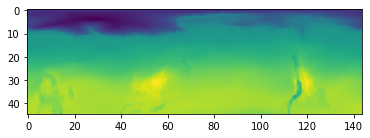

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.imshow(data[0])